In [6]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Train and Test Data 
cards = '/Users/ceo/Desktop/'
cardsdf=  pd.read_csv(cards + 'creditcard.csv') 
cardsdf.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
cardsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
print(cardsdf.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [10]:
display(cardsdf.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
print(cardsdf.shape) 

(284807, 31)


In [12]:
cardsdf.duplicated() 

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [13]:
# testing with assert statement if I have null values
assert pd.notnull(cardsdf).all().all() 

In [14]:
cardsdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [15]:
print(cardsdf.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

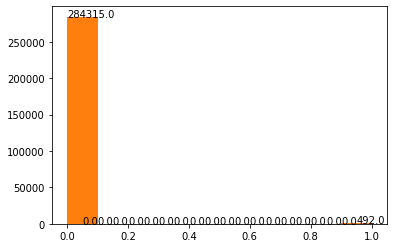

In [16]:
your_bins=20
arr=plt.hist(cardsdf.Class, bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.hist(cardsdf.Class, bins=10)

In [5]:
Fraud = cardsdf[cardsdf['Class']==1]
Normal = cardsdf[cardsdf['Class']==0]
outlier_fraction = len(Fraud)/float(len(Normal))
outlier_fraction

0.0017304750013189597

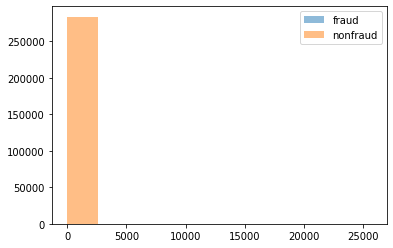

In [6]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = cardsdf.loc[cardsdf['Class'] == 1] 
df_non_fraud = cardsdf.loc[cardsdf['Class'] == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.Amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.Amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

In [5]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [34]:
Fraud.V1.describe()

count    492.000000
mean      -4.771948
std        6.783687
min      -30.552380
25%       -6.036063
50%       -2.342497
75%       -0.419200
max        2.132386
Name: V1, dtype: float64

In [35]:
Normal.V1.describe()

count    284315.000000
mean          0.008258
std           1.929814
min         -56.407510
25%          -0.917544
50%           0.020023
75%           1.316218
max           2.454930
Name: V1, dtype: float64

In [6]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

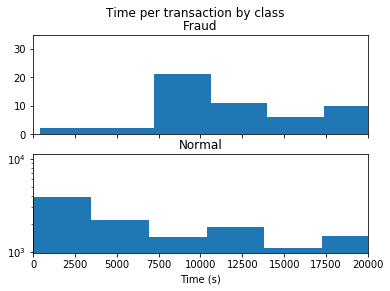

In [4]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time per transaction by class')
bins = 50
ax1.hist(Fraud.Time, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Time, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Time (s)')
plt.ylabel('')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [52]:
3600*21

75600

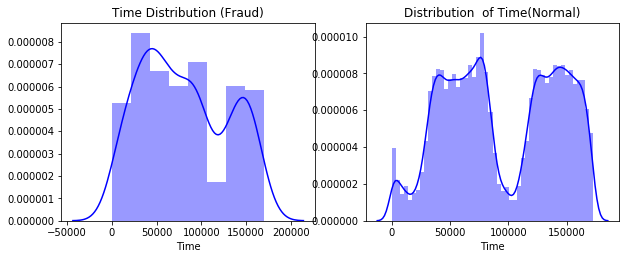

In [7]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Fraud)')

sns.distplot(Fraud.Time, color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution  of Time(Normal)')
sns.distplot(Normal.Time,color='blue');

In [8]:
timestamp = cardsdf[(cardsdf['Time'] > 7000) & (cardsdf['Time'] < 15000)]
print(timestamp.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      10997.950325 -0.184588  0.239849  1.065170  0.444398 -0.109791   
1       9766.882353 -1.653414  4.202895 -7.067815  5.946852 -1.361625   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.060855 -0.176792 -0.118980  1.442825  ... -0.018365 -0.070738   
1     -2.234023 -4.070300  1.265937 -2.440592  ...  0.474853  0.786328   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.135146 -0.026870  0.012419  0.085035  0.335552 -0.027775 -0.003705   
1     -0.173554 -0.046386 -0.411440  0.007817  0.381535  0.610177  0.380181   

          Amount  
Class             
0      59.290988  
1      60.289118  

[2 rows x 30 col

In [11]:
Fraud.V2.mean()

3.6237781019822792

In [13]:
Fraud.V4.mean()

4.542029104423097

In [14]:
Fraud.V8.mean()

0.570635895296237

In [16]:
Fraud.V11.mean()

3.8001729113746077

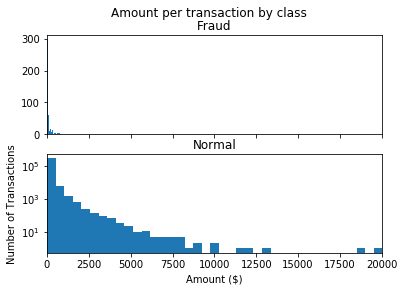

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Text(0.5, 0, '')

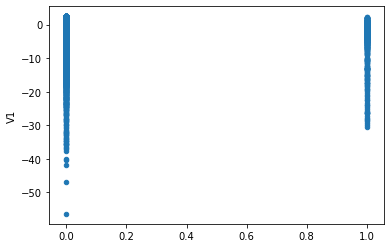

In [19]:
cardsdf.plot.scatter(x='Class',

                     y='V1'                     

                    ) ;plt.title('');plt.xlabel('')


Text(0.5, 0, '')

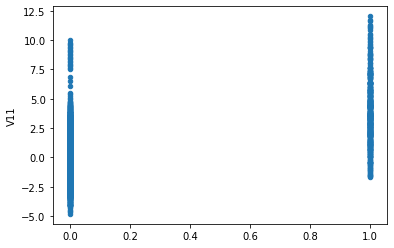

In [18]:
cardsdf.plot.scatter(x='Class',

                     y='V11'                     

                    ) ;plt.title('');plt.xlabel('')


In [ ]:
boxplot = cardsdf.boxplot(column=['V1', 'V11'], by=['Class', 'Time'])

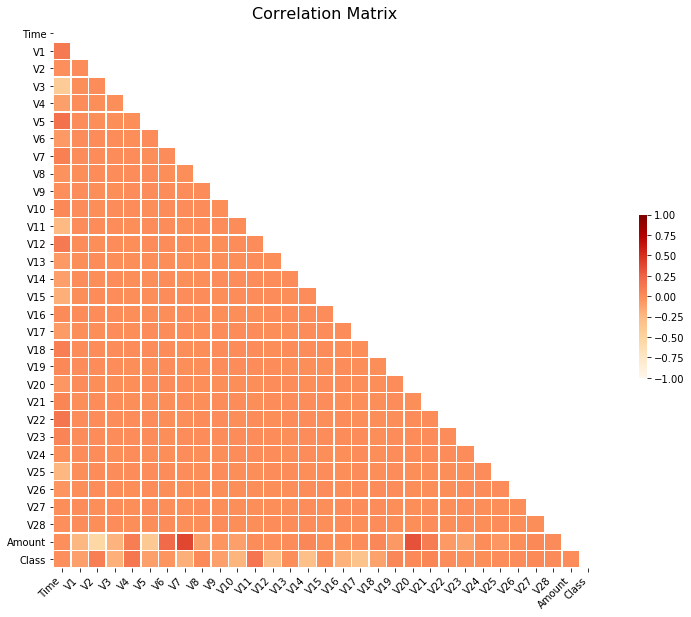

In [15]:
plt.figure(figsize=(15,10))

corr = cardsdf.corr()
#plt.rcParams["figure.figsize"] = (10,10)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(

    corr, 

    vmin=-1, vmax=1, center=0,
cmap='OrRd',
    #cmap=sns.diverging_palette(250, 15, s=75, l=40,
   #         n=9, center="dark"),
mask=mask, 
square=True,    
linewidths=.3,
cbar_kws={"shrink": .3}, 
  
)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);


plt.title('Correlation Matrix', fontsize=16);

Text(0.5, 0, 'Sale Prices')

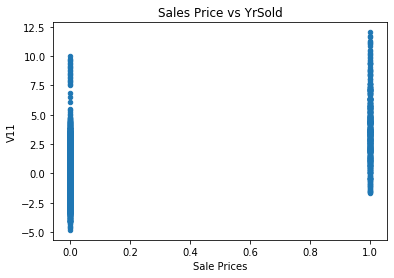

In [13]:
cardsdf.plot.scatter(x='Class',

                     y='V11'                     

                    ) ;plt.title('Sales Price vs YrSold');plt.xlabel('Sale Prices')

                     

Text(0.5, 0, 'Sale Prices')

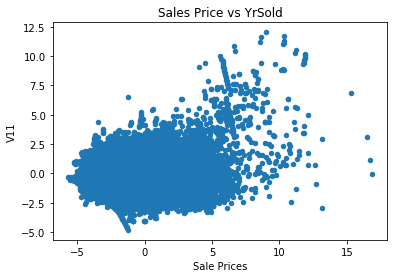

In [14]:
cardsdf.plot.scatter(x='V4',

                     y='V11'                     

                    ) ;plt.title('Sales Price vs YrSold');plt.xlabel('')

                     

Text(0.5, 0, 'Sale Prices')

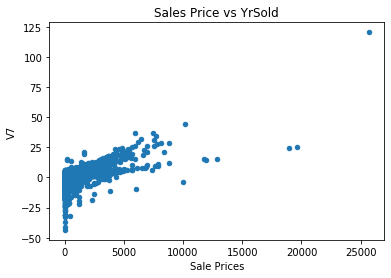

In [17]:
cardsdf.plot.scatter(x='Amount',

                     y='V7'                     

                    ) ;plt.title('Sales Price vs YrSold');plt.xlabel('Sale Prices')

In [ ]:
import seaborn as sns
plot = sns.boxplot(y='V11', x='V4', 
                 data=cardsdf, 
                 width=0.5,
                 palette="colorblind")